# Proyek Analisis Data: Bike Sharing Dataset

- **Nama**: Gideon Toranawa Ladiyo
- **Email**: gideonladiyo12@gmail.com
- **ID Dicoding**: gideonladiyo

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Apa perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?
- Mengapa masih ada orang yang menyewa sepeda tanpa mendaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_row", None)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_df = pd.read_csv("data/hour.csv")
print(bike_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


Data yang akan digunakan hanyalah file `hour.csv` karena lebih kompleks dengan tambahan kolom hour yang berarti data tercatat setiap jam yang memungkinkan kita untuk melakukan analisis lebih dalam

### Asserting Data

#### Menilai data `bike_df`

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data pada kolom `dteday` masih berupa `object`

In [4]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
print(f"Jumlah duplikasi: {bike_df.duplicated().sum()}")

Jumlah duplikasi: 0


#### Kesimpulan Asserting Data:
Tidak terdapat kesalahan data seperti kekosongan data, duplikat, dan isi data yang tidak sesuai. Tetapi kita bisa memperbaiki nama kolom pada data supaya lebih jelas dan memperbaiki tipe data pada kolom `dteday`.

### Cleaning Data

Memperbaiki nama kolom pada data

In [6]:
bike_df = bike_df.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity', 'weathersit':'weather', 'cnt':'count', 'hr':'hour', 'dteday':'dateday'})
print(bike_df.columns)

Index(['instant', 'dateday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


Mengganti tipe data kolom `dateday` menjadi `datetime`

In [7]:
bike_df["dateday"] = pd.to_datetime(bike_df["dateday"])
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Eksploratory Data Analyst (EDA)

### Pertanyaan untuk melakukan analisis data:
1. #### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
2. #### Apa perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?
3. #### Mengapa masih ada orang yang menyewa sepeda tanpa mendaftar?

### Eksplor `bike_hour_df`

In [8]:
bike_df.describe(include="all")

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi bahwa rata-rata penyewa menyewa sepeda pada `jam 11` dengan standar deviasinya sebesar `6,9 jam`. Ini menunjukkan bahwa penyewa menyewa sepeda pada saat aktivitas sehari-hari berlangsung dari `jam 4 hingga jam 17`. Kita juga mendapatkan informasi bahwa jumlah penyewa dengan status `registered` lebih banyak dari penyewa dengan status `casual`. Kita juga mendapatkan informasi bahwa rata-rata orang menyewa sepeda dengan `cuaca cerah(1,425....)` dengan standar deviasi `0,639...` yang berarti lebih banyak orang menyewa sepeda pada `cuaca cerah/berawah hingga cuaca kabut + berawan`.

In [9]:
bike_df.corr(numeric_only=True)

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Dari tabel korelasi antara tiap kolom, ditemukan beberapa nilai korelasi yang berhubungan dengan pertanyaan bisnis. Korelasi antara `cuaca` dengan `jumlah penyewaan` menunjukkan korelasi yang sangat lemah, yaitu sebesar `-0,14`.

In [10]:
bike_by_weekday = bike_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum"
})
print(bike_by_weekday)

         casual  registered
weekday                    
0        140521      303506
1         70784      384719
2         57843      411266
3         57319      415729
4         61460      423935
5         78238      409552
6        153852      323955


Dari jumlah peminjam dengan status `casual` dan `registered` yang disatukan berdasarkan `weekday` dan `hour`, kita dapat menyimpulkan beberapa hal. Pada `penyewa casual`, lebih banyak terjadi pada hari 0(minggu) dan 6(sabtu) yang menunjukkan pola di mana `penyewa casual` paling sering meminjam pada hari `weekend` yang digunakan untuk berekreasi atau berpergian ke tempat lain. Sedangkan `penyewa registered` menggunakannya untuk `pergi ke kantor, sekolah, kasual atau ke tempat kerja yang membutuhkan transportasi` seperti sepeda. Sehingga ini menunjukkan bahwa masih adanya penyewa casual karena penyewa tidak memerlukan untuk kehidupan sehari-hari, mereka menyewanya pada weekend.

In [11]:
avg_rental_by_workingday = bike_df.groupby(by="workingday").agg(
    {
        "count": ["sum", "mean"]
    }
)
print(avg_rental_by_workingday)

              count            
                sum        mean
workingday                     
0           1000269  181.405332
1           2292410  193.207754


Hasil rangkuman di atas menunjukkan `jumlah penyewa` dan `rata-rata penyewa` berdasarkan status meminjam pada saat `working day(1)` atau tidak. Dapat dilihat bahwa jumlah penyewa pada working day lebih banyak, begitupun rata-ratanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Untuk menjawab pertanyaan nomor 1, kita perlu mencari hubungan antara cuaca terhadap jumlah penyewaan sepeda(registered dan casual) menggunakan visualisasi data yaitu `Scatter Plot`.

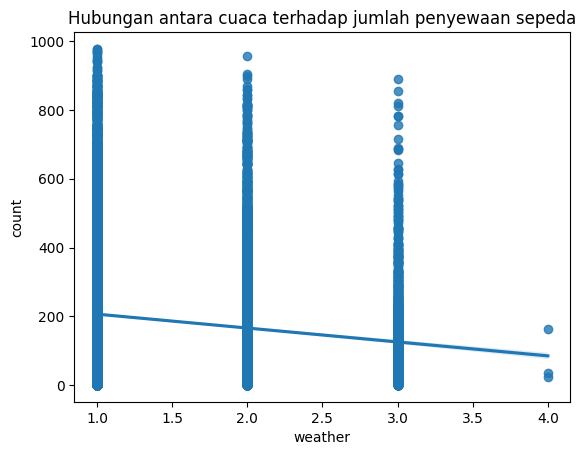

In [12]:
sns.regplot(x=bike_df["weather"], y=bike_df["count"])
plt.title("Hubungan antara cuaca terhadap jumlah penyewaan sepeda")
plt.show()

Hasil dari visualisasi data dengan `Scatter Plot` dan mencari nilai korelasi dari kolom `weather` terhadap kolom `count` yang bernilai `-0.1424...`  yaitu, cuaca tidak memengaruhi jumlah penyewaan sepeda, baik cuaca cerah hingga hujan lebat karena nilai korelasi bernilai `-0.1424...` atau hampir mendekati 0, berarti kolom `weather` dengan kolom `count` tidak memiliki hubungan yang kuat.

### Pertanyaan 2

Untuk menjawab pertanyaan nomor 2, kita perlu mengelompokkan data berdasarkan `workingday` untuk menampilkan mean(rata-rata) dari masing-masing nilai pada working day.

In [13]:
avg_rental_by_workingday.columns = ["total_count", "avg_count"]
avg_rental_by_workingday = avg_rental_by_workingday.reset_index()

print(avg_rental_by_workingday)

   workingday  total_count   avg_count
0           0      1000269  181.405332
1           1      2292410  193.207754


Setelah dikelompokan menjadi satu dataframe, visualisasikan hasilnya

C:\Users\ACER\AppData\Local\Temp\ipykernel_25160\2234923990.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="avg_count", data=avg_rental_by_workingday, palette=colors, ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_25160\2234923990.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="total_count", data=avg_rental_by_workingday, palette=colors, ax=ax[1])


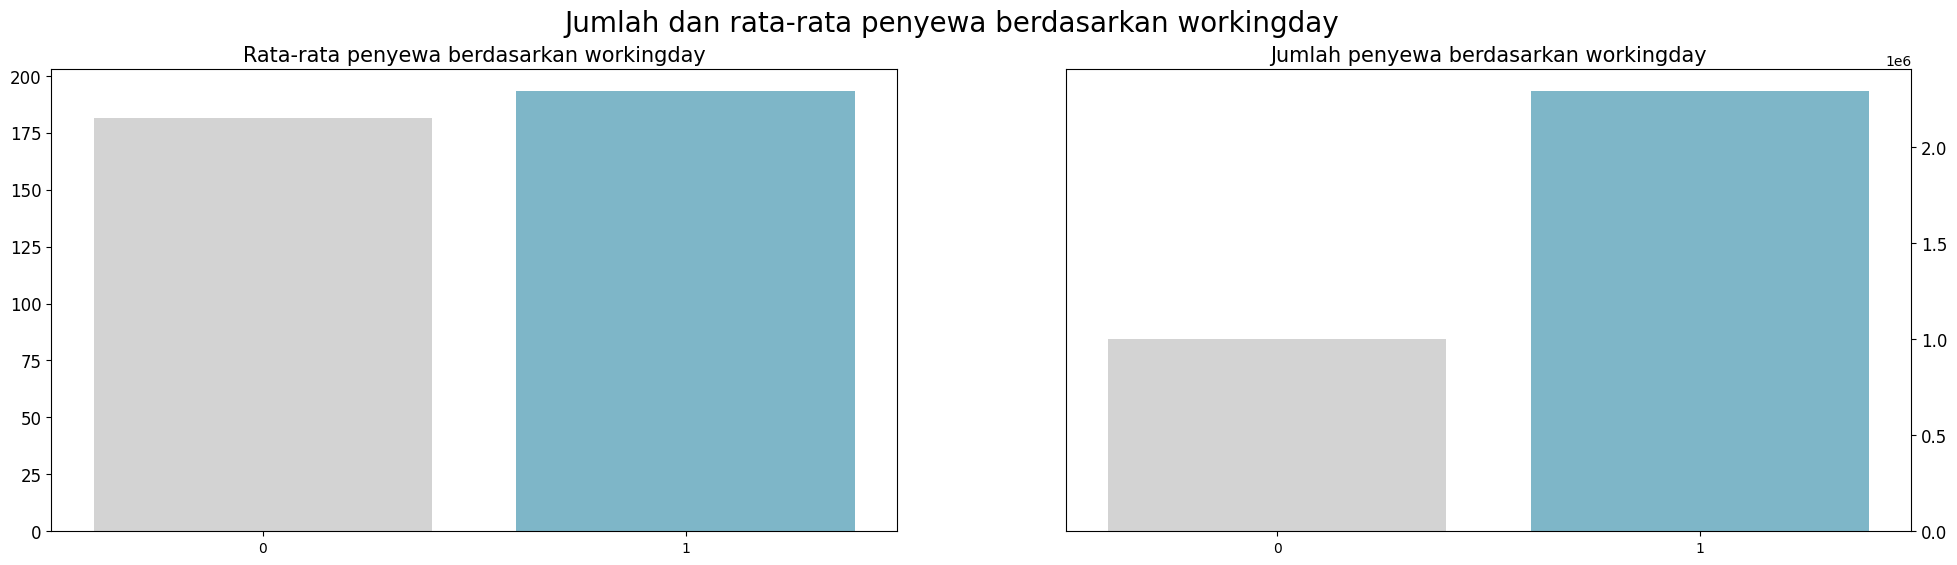

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(x="workingday", y="avg_count", data=avg_rental_by_workingday, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Rata-rata penyewa berdasarkan workingday", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="workingday", y="total_count", data=avg_rental_by_workingday, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah penyewa berdasarkan workingday", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Jumlah dan rata-rata penyewa berdasarkan workingday", fontsize=20)
plt.show()

Hasil:
1. Hari tidak bekerja:
    - Total penyewaan: 1.000.269
    - Rata-rata penyewaan: 181,405332 per hari
3. Hari bekerja:
    - Total penyewaan: 2.292.410
    - Rata-rata penyewaan: 193,207754 per hari

Dari hasil di atas, ditemukan bahwa penyewaan pada hari bekerja lebih tinggi dibandingkan dengan hari libur baik dari segi jumlah maupun rata-rata. Dari segi jumlah, kedua sisi memiliki selisih jumlah sebesar lebih dari satu juta. Daru segi rata-rata, kedua sisi tidak memiliki selisih yang jauh. Dapat disimpulkan bahwa penggunaan sepeda masih sering digunakan dari dua sisi. Pada hari bekerja, penyewa menggunakannya ke tempat seperti pergi ke tempat kerja, sekolah, atau kuliah pada hari kerja. Pada hari libur, penyewa menggunakannya untuk berekreasi atau ke tempat lainnya.

### Pertanyaan 3

Untuk menjawab pertanyaan nomor 3, kita perlu menampilkan visualisasi dari masing-masing kriteria yaitu `registered` dan `casual` berdasarkan jam peminjaman. Kita akan menggunakan `Point Plot` dengan `weekday` sebagai hue untuk melihat pola dari masing-masing hari

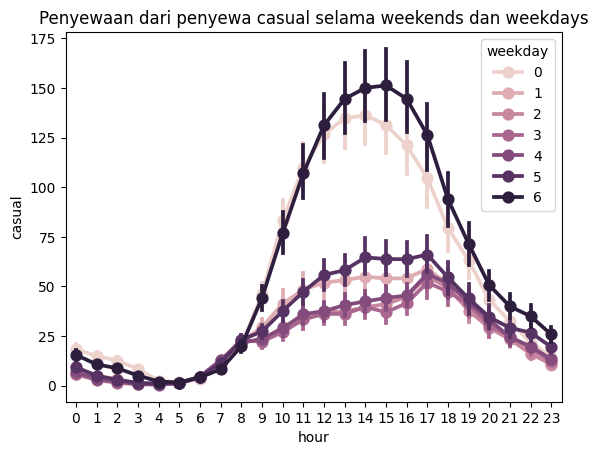

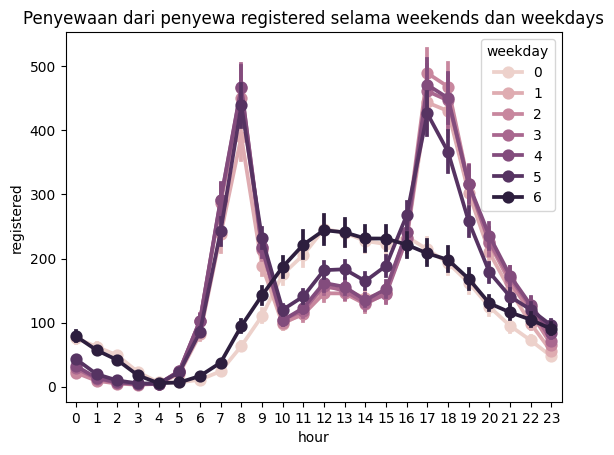

In [15]:
sns.pointplot(data=bike_df, x='hour', y='casual', hue='weekday')
plt.title('Penyewaan dari penyewa casual selama weekends dan weekdays')
plt.show()

sns.pointplot(data=bike_df, x='hour', y='registered', hue='weekday')
plt.title('Penyewaan dari penyewa registered selama weekends dan weekdays')
plt.show()

Hasil:
Dari hasil visualisasi kedua kriteria yaitu registered dan casual, dapat terlihat pola yang berbeda pada jenis hari dan jam penyewaannya. Pada penyewa `casual`, penyewa paling banyak menyewa sepeda pada hari 0(minggu) dan 6(sabtu) pada rentang jam naik mulai dari jam 7-8 hingga pada puncaknya pada jam 14-15. Sedangkan pada penyewa `registered`, penyewa paling banyak pada hari selain 0(minggu) dan 6(sabtu) dengan jumlah penyewa paling banyak pada jam 7 hingga 8 dan jam 15 hingga jam 19-20. Ini menunjukkan pola yang berbeda di mana `penyewa casual` paling sering meminjam pada hari `weekend` yang digunakan untuk berekreasi atau berpergian ke tempat lain. Sedangkan `penyewa registered` menggunakannya untuk `pergi ke kantor, sekolah, kasual atau ke tempat kerja yang membutuhkan transportasi` seperti sepeda. Sehingga ini menunjukkan bahwa masih adanya penyewa casual karena penyewa tidak memerlukan untuk kehidupan sehari-hari, mereka menyewanya pada weekend.

## Teknik Analisis Lanjutan

Teknik yang akan digunakan adalah `Clustering`. Clustering adalah teknik dalam analisis data yang bertujuan untuk mengelompokkan sekumpulan objek berdasarkan kesamaan karakteristik atau fitur yang dimilikinya. Objek-objek yang berada dalam satu kelompok (cluster) akan lebih mirip satu sama lain dibandingkan dengan objek-objek di kelompok lain.

Tujuan utama dari penggunaan teknik clustering pada analisis data kali ini adalah untuk `mengelompokkan data` yang memiliki karakteristik serupa ke dalam `grup-grup atau cluster`, sehingga objek dalam satu cluster lebih mirip satu sama lain dibandingkan dengan objek di cluster lain.

### 1. Preprocessing Data (Pra-pemrosesan Data)

Pilih fitur-fitur yang bisa mewakili pola penyewaan. Beberapa fitur mungkin memiliki rentang nilai yang berbeda, seperti suhu dan jumlah penyewaan. Oleh karena itu, penting untuk melakukan normalisasi data, seperti `Min-Max` Scaling atau `Standarisasi`, sehingga semua fitur berada pada skala yang sama.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(bike_df[['casual', 'registered', 'count', 'temp', 'humidity', 'windspeed', 'hour', 'workingday', 'holiday']])

### 2. Menentukan Jumlah Cluster yang Optimal

Untuk memilih jumlah cluster yang optimal, metode yang umum digunakan adalah Elbow Method

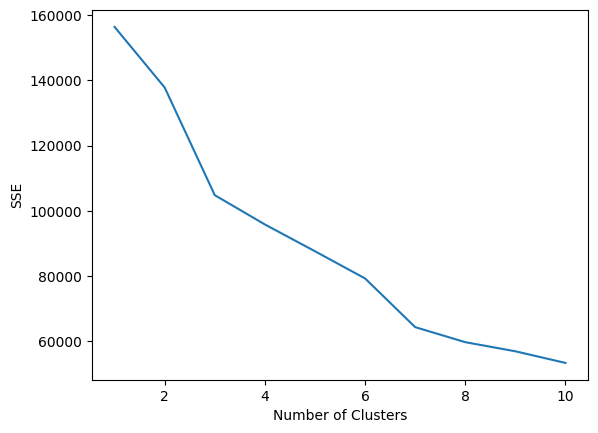

In [17]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Dari hasil visualisasi di atas, jumlah cluster 4 dapat digunakan karena berada di posisi yang optimal. Kemudian kita akan menggunakan algoritma `K-Means` untuk mengelompokkan data

### 3. Melakukan Clustering dengan K-Means

Setelah menentukan jumlah cluster yang optimal, terapkan algoritma K-Means untuk mengelompokkan data.

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
bike_df['cluster'] = kmeans.labels_

### 4. Visualisasi Hasil Clustering

Visualisasikan hasil clustering dengan menggunakan PCA (Principal Component Analysis) untuk mengurangi dimensi data menjadi 2 dimensi agar lebih mudah divisualisasikan.

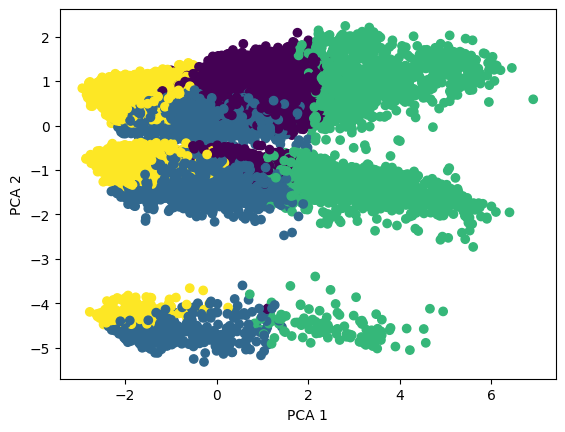

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=bike_df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 5. Menganalisis Cluster yang Terbentuk

In [20]:
bike_df.groupby('cluster').mean()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
cluster,,,,,,,,,,,,,,,,,
0,9096.391113,2012-01-19 02:10:27.466002688,2.780310,0.497031,7.158782,15.280023,0.000383,2.991189,0.882973,1.409692,0.607343,0.576437,0.619939,0.171616,40.736257,209.992913,250.729171
1,7104.436941,2011-10-27 13:46:32.055610624,1.925521,0.431976,5.192651,14.880834,0.069513,2.978649,0.571500,1.407895,0.323406,0.314882,0.524101,0.267728,16.458540,99.991063,116.449603
2,10710.579228,2012-03-26 13:38:07.684728832,2.783662,0.690887,7.057882,15.054598,0.042693,3.076765,0.458949,1.229475,0.655419,0.613426,0.494433,0.218382,125.356732,390.942529,516.299261
3,8574.571303,2011-12-28 16:00:00.000000000,2.533017,0.476993,6.697401,4.264313,0.020021,3.001581,0.673516,1.535652,0.450811,0.438403,0.763679,0.140027,6.264313,38.845978,45.110292


Dari hasil penggunaan algoritma `K-Means` pada data, kita dapat mengelompokkan 4 cluster berdasarkan karakteristiknya.
- Cluster 0:
```
hour = sore(15)
season = musim panas(2.78)
weather = cerah(1.4)
temp = suhu hangat(0.607)
humidity = sedang(0.620...)
casual = 40,....
registered = 210
```

- Cluster 1:
```
hour = siang(14.8....)
season = musim semi(1.93...)
weather = cerah(1.41...)
temp = sejuk(0.323...)
humidity = sedang(0.524...)
casual = 16,...
registered = 100
```

- Cluster 2:
```
hour = sore(15)
season = musim panas(2.78)
weather = cerah(1.23)
temp = hangat(0.655...)
humidity = sedang(0.494...)
casual = 125
registered = 390
```

- Cluster 3:
```
hour = 4(pagi)
season = musim panas(2.53)
weather = cerah(1.53)
temp = dingin(0.45...)
humidity = tinggi(0.763....)
casual = 6
registered = 38
```



Dari hasil pengelompokan/clustering, terbagi 4 cluster yaitu:
- `Cluster 0` yang dapat didefinisikan bahwa cluster ini mewakili hari kerja pada `sore hari di musim panas, dengan cuaca cerah dan suhu yang cukup hangat`. Pengguna mayoritas adalah pengguna `terdaftar (209.99)` dibandingkan dengan pengguna `kasual (40.74)`. Ini mengindikasikan bahwa kluster ini melibatkan waktu sibuk pada jam pulang kerja, dengan penggunaan sepeda yang cukup tinggi oleh pengguna tetap.
- `Cluster 1` yang dapat didefinisikan bahwa cluster ini menggambarkan `siang hari di musim semi, dengan suhu sejuk dan cuaca cerah`. Penggunaan sepeda oleh pengguna kasual lebih rendah (16.46), dan mayoritas pengguna adalah terdaftar (99.99). Ini menunjukkan aktivitas yang cukup rendah dibandingkan dengan kluster sebelumnya, mungkin karena waktu yang bukan jam sibuk, atau cuaca yang lebih dingin di musim semi.
- `Cluster 2` yang dapat didefinisikan bahwa cluster ini terjadi pada `sore hari di musim panas dengan suhu yang relatif hangat`. Pengguna casual meningkat drastis menjadi 125.36, dengan pengguna registered sebanyak 390.94. Kluster ini mungkin mewakili waktu-waktu yang sangat sibuk dengan jumlah total pengguna sepeda yang tinggi (516.30). Kemungkinan ini adalah waktu di akhir jam kerja atau sore hari di mana banyak orang, baik pengguna tetap maupun sesekali, menyewa sepeda.
- `Cluster 3` yang dapat didefinisikan bahwa cluster ini mewakili `pagi hari yang sangat awal di musim dingin dengan suhu dingin dan kelembapan yang tinggi`. Baik pengguna casual (6.26) maupun registered (38.85) sangat rendah, yang menunjukkan waktu penggunaan sepeda yang sangat sedikit, mungkin karena waktu yang sangat pagi, cuaca dingin, dan kondisi kurang ideal untuk bersepeda.

## Conclusion

- Conclusion pertanyaan 1

Tidak terdapat pengaruh yang besar dari `cuaca` terhadap `jumlah penyewa`. Walaupun pada saat melihat rangkuman parameter statistik dari dataset menunjukkan bahwa rata-rata orang menyewa pada saat cuaca sedang `cerah atau berawan`, hasil korelasi menunjukkan bahwa pengaruh dari `cuaca` terhadap `jumlah penyewa` sangat kecil, sehingga penyewa bisa menyewa sepeda tidak bergantung pada keadaan cuaca.

- Conclusion pertanyaan 2

Pola penyewaan terlihat bahwa penyewa lebih banyak menyewa sepeda pada saat `working day`. Rata-rata dari kedua aspek yaitu pada saat working day atau tidak menunjukkan bahwa selisih kedua aspek tidak signifikan sehingga penyewa bisa meminjam sepeda pada saat `bekerja atau tidak`

- Conclusion pertanyaan 3

Masih adanya penyewa yang tidak melakukan `registrasi` karena penyewa dengan status `casual` lebih banyak menyewa pada saat weekend atau hari sabtu/minggu. Mereka menyewa sepeda dengan kebutuhan rekreasi, atau berpergian ke suatu tempat saat weekend. Sedangkan penyewa dengan status `registered` lebih banyak menyewa bukan pada saat `weekend` yang berarti mereka membutuhkan sepeda yang merupakan transportasi umum untuk melakukan perjalanan ke kantor, sekolah, atau kuliah.